# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV563"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
OUTPUT_FIGURES_DIR = Path(
    conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
).resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv563')

In [5]:
OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
display(OUTPUT_CELL_TYPE_FILEPATH)

PosixPath('/opt/manuscript/content/images/lvs_analysis/lv563/lv563-cell_types.svg')

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP064464, SRP057196, SRP055569, SRP042161, SRP066834, SRP050499, SRP014428, SRP055810, SRP017575, SRP048971, SRP027383, SRP008145, SRP058773, SRP042620, SRP055153, SRP035638, SRP059379, SRP009862, SRP052056, SRP025982, SRP007947, SRP005279, SRP014213, SRP018853, SRP050992, SRP045500, SRP007508, SRP004637, SRP024268, SRP051688, SRP006474, SRP061881, SRP027015, SRP033135, SRP007525, SRP013450, SRP018525, SRP011422, SRP063840, SRP017777, SRP009266, SRP003901, SRP013363, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (42 != 44)
  warnings.warn(


In [18]:
lv_data.shape

(8116, 103)

In [19]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     assigned cell type qc pass cell count ercc_mix  \
project   run                                                         
SRP060416 SRR2088096                NaN     NaN        NaN      NaN   
          SRR2088128                NaN     NaN        NaN      NaN   
          SRR2088153                NaN     NaN        NaN      NaN   
          SRR2088179                NaN     NaN        NaN      NaN   
          SRR2088205                NaN     NaN        NaN      NaN   

                     ercc_dilution tissue  age  ... supplementary file  \
project   run                                   ...                      
SRP060416 SRR2088096           NaN    NaN  NaN  ...                NaN   
          SRR2088128           NaN    NaN  NaN  ...                NaN   
          SRR2088153           NaN    NaN  NaN  ...                NaN   
          SRR2088179           NaN    NaN  NaN  ...                NaN   
          SRR2088205           NaN    NaN  NaN  ...                NaN   

                     cell source origin antibodies pathology tumor stage  \
project   run                                                              
SRP060416 SRR2088096         NaN    NaN        NaN       NaN         NaN   
          SRR2088128         NaN    NaN        NaN       NaN         NaN   
          SRR2088153         NaN    NaN        NaN       NaN         NaN   
          SRR2088179         NaN    NaN        NaN       NaN         NaN   
          SRR2088205         NaN    NaN        NaN       NaN         NaN   

                     cell line stably expressing par-clip antibody  \
project   run                                                        
SRP060416 SRR2088096                         NaN               NaN   
          SRR2088128                         NaN               NaN   
          SRR2088153                         NaN               NaN   
          SRR2088179                         NaN               NaN   
          SRR2088205                         NaN               NaN   

                     culture medium     LV563  
project   run                                  
SRP060416 SRR2088096            NaN  0.295516  
          SRR2088128            NaN -0.101337  
          SRR2088153            NaN -0.136368  
          SRR2088179            NaN  0.072113  
          SRR2088205            NaN -0.099378  

[5 rows x 103 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

assigned cell type        0.091490
qc pass                   0.091490
cell count                0.091490
ercc_mix                  0.091490
ercc_dilution             0.091490
tonsil donor              0.034668
facs gating               0.034668
c1 chip id                0.021278
experiment_sample_name    0.021278
age                       0.016195
marker                    0.012664
cell type                 0.011236
source                    0.009477
tissue                    0.008894
infection                 0.008670
cell passages             0.008670
human cell type           0.008670
human cell line           0.008670
lineage                   0.006532
embryo number             0.006532
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.011236
tissue       0.008894
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        # "tissue subtype",
        # "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP060416 SRR2088422                       tonsil Innate lymphoid cells   
SRP064464 SRR2558141                                                NaN   
SRP057196 SRR1974619                                             hybrid   
SRP060416 SRR2088347                       tonsil Innate lymphoid cells   
SRP055569 SRR1821414  mixture of U87 human glioma cells and MCF10a h...   
SRP060416 SRR2088381                       tonsil Innate lymphoid cells   
          SRR2088248                       tonsil Innate lymphoid cells   
SRP042161 SRR1295222                             Gliomasphere Cell Line   
SRP060416 SRR2088180                       tonsil Innate lymphoid cells   
SRP057196 SRR1974862                                         astrocytes   
SRP060416 SRR2088138                       tonsil Innate lymphoid cells   
SRP057196 SRR1974733                                         astrocytes   
SRP066834 SRR2967482                                                NaN   
          SRR2967761                                                NaN   
SRP060416 SRR2088080                       tonsil Innate lymphoid cells   
SRP055569 SRR2019068                  WI-38 human lung fibroblast cells   
SRP060416 SRR2088677                       tonsil Innate lymphoid cells   
SRP057196 SRR1974782                                            neurons   
SRP060416 SRR2088143                       tonsil Innate lymphoid cells   
SRP057196 SRR1974975                                    fetal_quiescent   
SRP050499 SRR2013753                                                NaN   
SRP057196 SRR1974987                                    fetal_quiescent   
SRP042161 SRR1295170                             Gliomasphere Cell Line   
SRP060416 SRR2088453                       tonsil Innate lymphoid cells   
          SRR2088450                       tonsil Innate lymphoid cells   

                                                                 tissue  \
project   run                                                             
SRP060416 SRR2088422                                                NaN   
SRP064464 SRR2558141                                                NaN   
SRP057196 SRR1974619                                             cortex   
SRP060416 SRR2088347                                                NaN   
SRP055569 SRR1821414                                                NaN   
SRP060416 SRR2088381                                                NaN   
          SRR2088248                                                NaN   
SRP042161 SRR1295222                                                NaN   
SRP060416 SRR2088180                                                NaN   
SRP057196 SRR1974862                                             cortex   
SRP060416 SRR2088138                                                NaN   
SRP057196 SRR1974733                                             cortex   
SRP066834 SRR2967482  Microdissected cortical-like ventricle from ce...   
          SRR2967761                                    Fetal neocortex   
SRP060416 SRR2088080                                                NaN   
SRP055569 SRR2019068                                                NaN   
SRP060416 SRR2088677                                                NaN   
SRP057196 SRR1974782                                             cortex   
SRP060416 SRR2088143                                                NaN   
SRP057196 SRR1974975                                             cortex   
SRP050499 SRR2013753                                                NaN   
SRP057196 SRR1974987                                             cortex   
SRP042161 SRR1295170                                                NaN   
SRP060416 SRR2088453                                                NaN   
          SRR2088450                                                NaN   

          

In [25]:
# what is there in these projects?
lv_data.loc[["SRP064464"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

assigned cell type qc pass cell count ercc_mix  \
project   run                                                         
SRP064464 SRR2558141          undefined    TRUE          1     mix2   
          SRR2558177             acinar    TRUE          1     mix2   
          SRR2558174               beta    TRUE          1     mix2   
          SRR2558152               beta    TRUE          1     mix2   
          SRR2558136              alpha    TRUE          1     mix2   
          SRR2558180              alpha    TRUE          1     mix2   
          SRR2558179               beta    TRUE          1     mix2   
          SRR2558148                 pp    TRUE          1     mix2   
          SRR2558167             acinar    TRUE          1     mix2   
          SRR2558160                 pp    TRUE          1     mix2   

                     ercc_dilution     LV563  
project   run                                 
SRP064464 SRR2558141       1000000  2.545753  
          SRR2558177       1000000  0.094281  
          SRR2558174       1000000  0.072926  
          SRR2558152       1000000  0.068675  
          SRR2558136       1000000  0.067171  
          SRR2558180       1000000  0.063607  
          SRR2558179       1000000  0.053876  
          SRR2558148       1000000  0.037061  
          SRR2558167       1000000  0.032759  
          SRR2558160       1000000  0.029586

In [26]:
SELECTED_ATTRIBUTE = "cell type"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [28]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [29]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [30]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [31]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP060416 SRR2088422                       tonsil Innate lymphoid cells   
SRP064464 SRR2558141                                    NOT CATEGORIZED   
SRP057196 SRR1974619                                             hybrid   
SRP060416 SRR2088347                       tonsil Innate lymphoid cells   
SRP055569 SRR1821414  mixture of U87 human glioma cells and MCF10a h...   
SRP060416 SRR2088381                       tonsil Innate lymphoid cells   
          SRR2088248                       tonsil Innate lymphoid cells   
SRP042161 SRR1295222                             Gliomasphere Cell Line   
SRP060416 SRR2088180                       tonsil Innate lymphoid cells   
SRP057196 SRR1974862                                         astrocytes   
SRP060416 SRR2088138                       tonsil Innate lymphoid cells   
SRP057196 SRR1974733                                         astrocytes   
SRP066834 SRR2967482  Microdissected cortical-like ventricle from ce...   
          SRR2967761                                    Fetal neocortex   
SRP060416 SRR2088080                       tonsil Innate lymphoid cells   
SRP055569 SRR2019068                  WI-38 human lung fibroblast cells   
SRP060416 SRR2088677                       tonsil Innate lymphoid cells   
SRP057196 SRR1974782                                            neurons   
SRP060416 SRR2088143                       tonsil Innate lymphoid cells   
SRP057196 SRR1974975                                    fetal_quiescent   

                         LV563  
project   run                   
SRP060416 SRR2088422  2.631564  
SRP064464 SRR2558141  2.545753  
SRP057196 SRR1974619  2.143779  
SRP060416 SRR2088347  2.015248  
SRP055569 SRR1821414  1.748698  
SRP060416 SRR2088381  1.214086  
          SRR2088248  1.126842  
SRP042161 SRR1295222  1.098617  
SRP060416 SRR2088180  1.091306  
SRP057196 SRR1974862  0.958756  
SRP060416 SRR2088138  0.845991  
SRP057196 SRR1974733  0.733854  
SRP066834 SRR2967482  0.675577  
          SRR2967761  0.607604  
SRP060416 SRR2088080  0.599864  
SRP055569 SRR2019068  0.573738  
SRP060416 SRR2088677  0.524542  
SRP057196 SRR1974782  0.505741  
SRP060416 SRR2088143  0.503713  
SRP057196 SRR1974975  0.450035

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [32]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
            "primary human NK cells": "NK cells",
            "primary human B cells": "B cells",
            "B-cells": "B cells",
        }
    }
)

In [33]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [34]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [35]:
# _srp_code = "SRP064464"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"Pancreatic islets"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [36]:
# _srp_code = "SRP045500"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"{lv_data.loc[(_srp_code, x.name), 'celltype']}"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'diseasestatus']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [39]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [40]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [41]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [42]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [43]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [44]:
len(attr_order)

15

In [45]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC1)',
 'NOT CATEGORIZED',
 'hybrid',
 'tonsil Innate lymphoid cells (NK)',
 'mixture of U87 human glioma cells and MCF10a human breast cancer cells']

## Plot

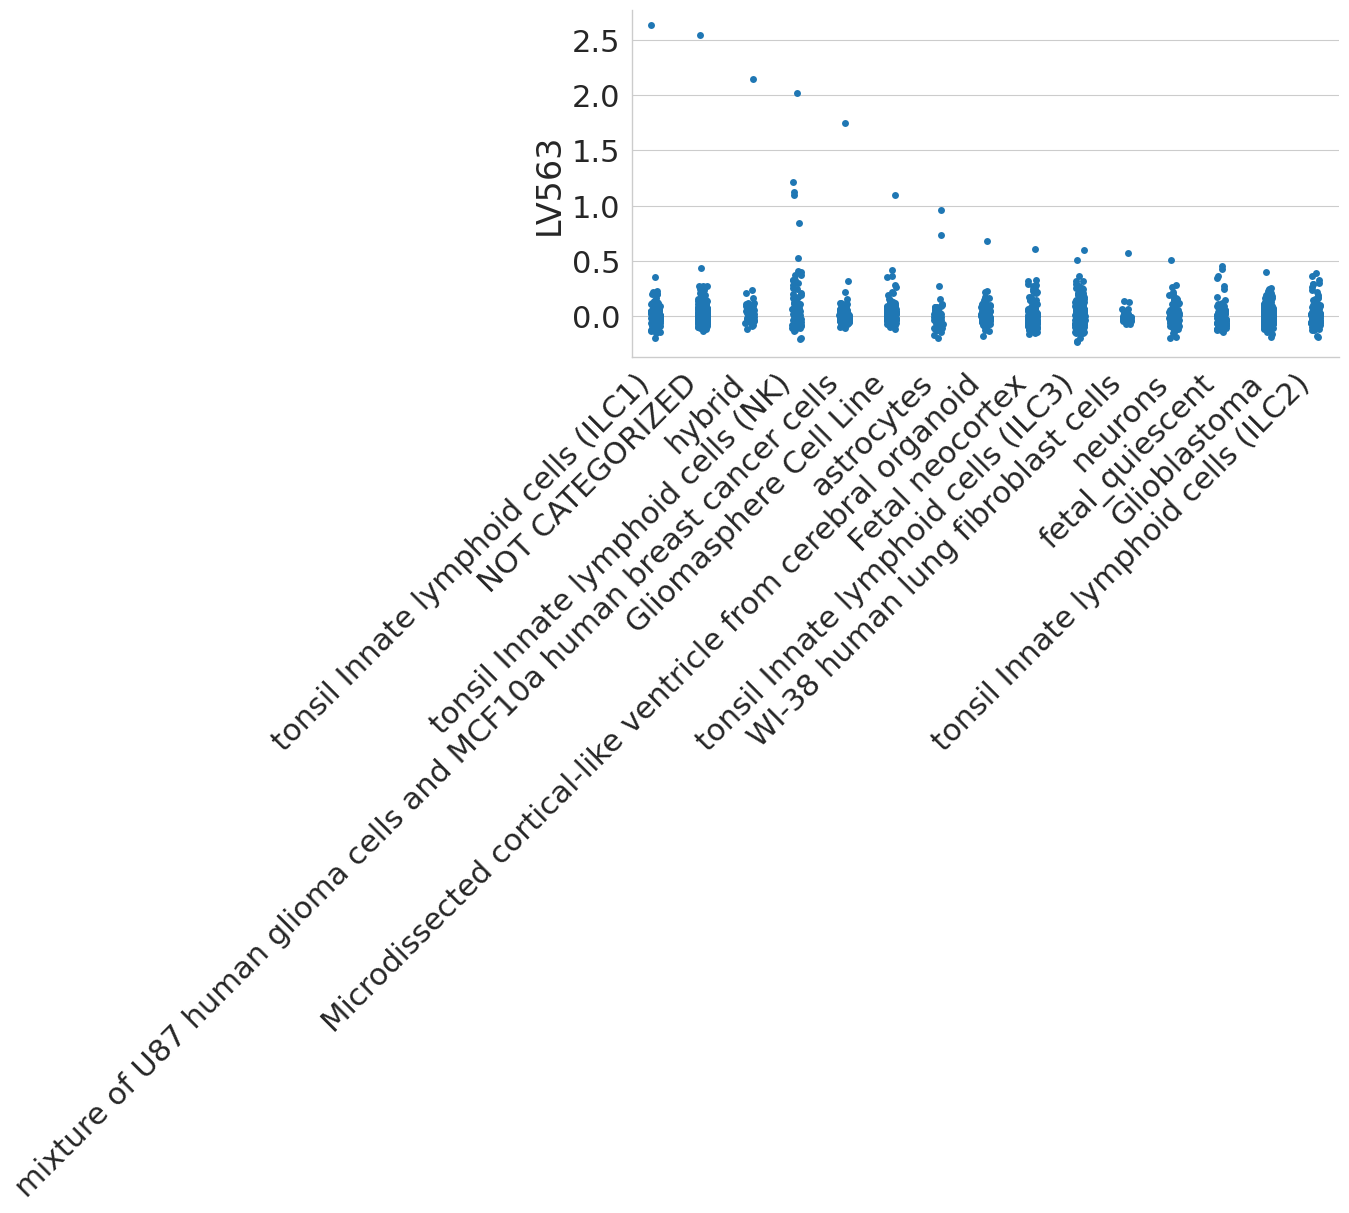

In [46]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [47]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [48]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("(NK)")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

/tmp/ipykernel_972/1318137467.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("(NK)")].sort_values(LV_NAME, ascending=False)


cell type     LV563
project   run                                                    
SRP060416 SRR2088347  tonsil Innate lymphoid cells (NK)  2.015248
          SRR2088381  tonsil Innate lymphoid cells (NK)  1.214086
          SRR2088248  tonsil Innate lymphoid cells (NK)  1.126842
          SRR2088180  tonsil Innate lymphoid cells (NK)  1.091306
          SRR2088138  tonsil Innate lymphoid cells (NK)  0.845991
          SRR2088677  tonsil Innate lymphoid cells (NK)  0.524542
          SRR2088453  tonsil Innate lymphoid cells (NK)  0.407369
          SRR2088450  tonsil Innate lymphoid cells (NK)  0.398041
          SRR2088635  tonsil Innate lymphoid cells (NK)  0.374657
          SRR2088543  tonsil Innate lymphoid cells (NK)  0.368038
          SRR2088326  tonsil Innate lymphoid cells (NK)  0.330213
          SRR2088113  tonsil Innate lymphoid cells (NK)  0.329067
          SRR2088582  tonsil Innate lymphoid cells (NK)  0.325249
          SRR2088096  tonsil Innate lymphoid cells (NK)  0.295516
          SRR2088491  tonsil Innate lymphoid cells (NK)  0.284849
SRP048971 SRR1613931                           NK cells  0.259640
SRP060416 SRR2088615  tonsil Innate lymphoid cells (NK)  0.255079
          SRR2088514  tonsil Innate lymphoid cells (NK)  0.244752
          SRR2088131  tonsil Innate lymphoid cells (NK)  0.210216
          SRR2088094  tonsil Innate lymphoid cells (NK)  0.194954

In [49]:
# # what is there in these projects?
# _tmp = lv_data.loc[["SRP060416"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# )

# display(_tmp.head(60))

In [50]:
# _tmp["facs gating"].value_counts()

# Reduced plot

## Data stats

In [51]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

count    8116.000000
mean        0.003625
std         0.084344
min        -0.231807
25%        -0.020135
50%        -0.000638
75%         0.010402
max         2.631564
Name: LV563, dtype: float64

In [52]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

,count,mean,std,min,25%,50%,75%,max
cell type,,,,,,,,
leukocyte from blood of healthy individual,2.0,0.192418,0.261022,0.007847,0.100132,0.192418,0.284703,0.376988
oocyte,3.0,0.085638,0.022828,0.059954,0.076651,0.093347,0.098480,0.103613
NK cells,9.0,0.109715,0.059933,0.068455,0.076504,0.083217,0.121207,0.259640
tonsil Innate lymphoid cells (NK),74.0,0.156526,0.350413,-0.212400,-0.029364,0.063985,0.193663,2.015248
zygote,2.0,0.049430,0.013682,0.039755,0.044592,0.049430,0.054267,0.059104
...,...,...,...,...,...,...,...,...
microglia,15.0,-0.040222,0.049959,-0.128303,-0.088339,-0.030321,0.002397,0.023644
oligodendrocytes,37.0,-0.025095,0.060406,-0.120763,-0.057882,-0.031525,0.004510,0.191550
"primary cutaneous melanoma (2.8 mm, level IV)",1.0,-0.045286,NaN,-0.045286,-0.045286,-0.045286,-0.045286,-0.045286


In [53]:
# keep cell types whose count is not too low and median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["count"] > 5)
    & (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

Index(['NK cells', 'tonsil Innate lymphoid cells (NK)',
       'primary human T cells', 'CD4+CD45RO+ T cells', 'Bone marrow',
       'primary human PBMC', 'B cells',
       'Head and Neck Squamous Cell Carcinoma cells',
       'tonsil Innate lymphoid cells (ILC1)', 'hybrid', 'fixed cell',
       'NG2-sorted cell from blood of melanoma patient',
       'tonsil Innate lymphoid cells (ILC3)',
       'ER+ Breast Cancer Primary Tumor', 'primary renal cell carcinoma',
       'large live', 'Gliomasphere Cell Line', 'primary human neutrophils',
       'NOT CATEGORIZED'],
      dtype='object', name='cell type')

In [54]:
final_plot_data.shape

(8116, 2)

In [55]:
reduced_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [56]:
reduced_plot_data.shape

(4164, 2)

## Shorten context names

In [73]:
reduced_plot_data = reduced_plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "tonsil Innate lymphoid cells (ILC3)": "tonsil ILCs (ILC3)",
            "tonsil Innate lymphoid cells (NK)": "tonsil ILCs (NK)",
            "tonsil Innate lymphoid cells (ILC2)": "tonsil ILCs (ILC2)",
            "tonsil Innate lymphoid cells (ILC1)": "tonsil ILCs (ILC1)",
            "primary human NK cells": "NK cells",
            "primary human neutrophils": "Neutrophils",
            "Head and Neck Squamous Cell Carcinoma cells": "Squamous Cell Carcinoma cells",
            "NG2-sorted cell from blood of melanoma patient": "Blood (melanoma)",
            "ER+ Breast Cancer Primary Tumor": "Breast Cancer (ER+)",
        }
    }
)

In [74]:
reduced_plot_data = reduced_plot_data[
    ~reduced_plot_data[SELECTED_ATTRIBUTE].isin((
        "NOT CATEGORIZED",
        "hybrid",
        "fixed cell",
    ))
]

In [75]:
reduced_plot_data.shape

(1033, 2)

## Set x-axis order

In [76]:
attr_order = (
    reduced_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:8]
    .tolist()
)

In [77]:
len(attr_order)

8

In [78]:
attr_order

['tonsil ILCs (ILC1)',
 'tonsil ILCs (NK)',
 'Gliomasphere Cell Line',
 'tonsil ILCs (ILC3)',
 'NK cells',
 'Breast Cancer (ER+)',
 'Bone marrow',
 'Squamous Cell Carcinoma cells']

## Plot

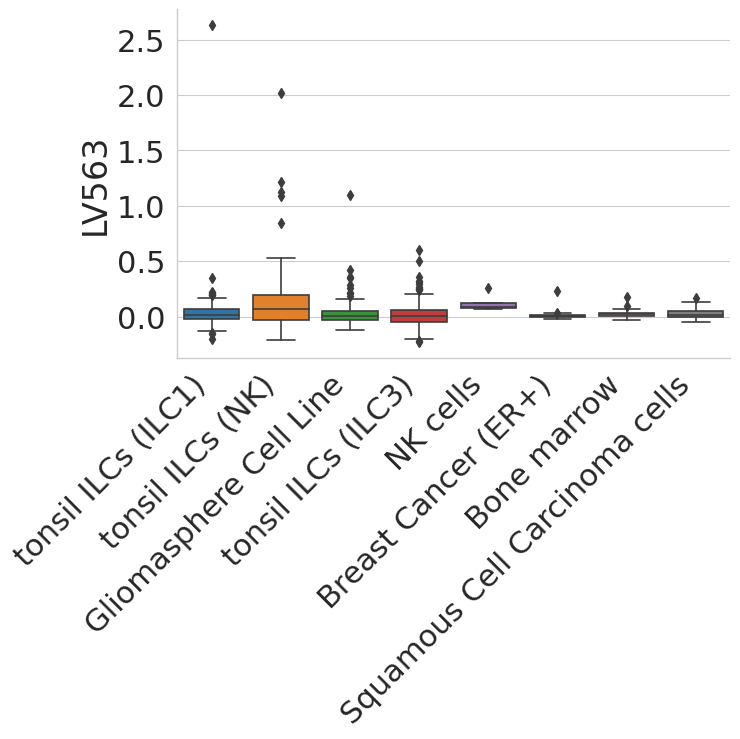

In [80]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=reduced_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=1.8,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    plt.savefig(
        OUTPUT_CELL_TYPE_FILEPATH,
        bbox_inches="tight",
        facecolor="white",
    )